In [52]:
import requests
import pandas as pd

headers = {'User-Agent': "gaixentechnical@gmail.com"}

companyTickers = requests.get(
    "https://www.sec.gov/files/company_tickers.json",
    headers=headers
    )

In [53]:
firstEntry = companyTickers.json()['0']
firstEntry

{'cik_str': 1045810, 'ticker': 'NVDA', 'title': 'NVIDIA CORP'}

In [54]:
directCik = companyTickers.json()['0']['cik_str']
directCik 

1045810

In [55]:
companyData = pd.DataFrame.from_dict(companyTickers.json(),
                                     orient='index')

companyData['cik_str'] = companyData['cik_str'].astype(
                           str).str.zfill(10)

print(companyData[:1])

      cik_str ticker        title
0  0001045810   NVDA  NVIDIA CORP


In [56]:
cik = companyData[0:1].cik_str[0]


C:\Users\DELL\AppData\Local\Temp\ipykernel_18168\4266292790.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cik = companyData[0:1].cik_str[0]


In [57]:

filingMetadata = requests.get(
    f'https://data.sec.gov/submissions/CIK{cik}.json',
    headers=headers
    )

print(f"Filling Meta-data: {filingMetadata.json().keys()}")

Filling Meta-data: dict_keys(['cik', 'entityType', 'sic', 'sicDescription', 'ownerOrg', 'insiderTransactionForOwnerExists', 'insiderTransactionForIssuerExists', 'name', 'tickers', 'exchanges', 'ein', 'lei', 'description', 'website', 'investorWebsite', 'category', 'fiscalYearEnd', 'stateOfIncorporation', 'stateOfIncorporationDescription', 'addresses', 'phone', 'flags', 'formerNames', 'filings'])


In [58]:
filingMetadata.json()['filings']
print(f"{filingMetadata.json()['filings'].keys()}")

dict_keys(['recent', 'files'])


In [59]:
filingMetadata.json()['filings']['recent']
print(f"{filingMetadata.json()['filings']['recent'].keys()}")

dict_keys(['accessionNumber', 'filingDate', 'reportDate', 'acceptanceDateTime', 'act', 'form', 'fileNumber', 'filmNumber', 'items', 'core_type', 'size', 'isXBRL', 'isInlineXBRL', 'primaryDocument', 'primaryDocDescription'])


In [60]:
allForms = pd.DataFrame.from_dict(
             filingMetadata.json()['filings']['recent']
             )

allForms.columns

Index(['accessionNumber', 'filingDate', 'reportDate', 'acceptanceDateTime',
       'act', 'form', 'fileNumber', 'filmNumber', 'items', 'core_type', 'size',
       'isXBRL', 'isInlineXBRL', 'primaryDocument', 'primaryDocDescription'],
      dtype='object')

In [61]:
allForms[['accessionNumber', 'reportDate', 'form']].head(10)

# 10-Q metadata
allForms.iloc[11]

accessionNumber                        0001588670-25-000006
filingDate                                       2025-08-06
reportDate                                       2025-08-04
acceptanceDateTime                 2025-08-06T23:19:31.000Z
act                                                        
form                                                      4
fileNumber                                                 
filmNumber                                                 
items                                                      
core_type                                                 4
size                                                  35818
isXBRL                                                    0
isInlineXBRL                                              0
primaryDocument          xslF345X05/wk-form4_1754522367.xml
primaryDocDescription                                FORM 4
Name: 11, dtype: object

In [62]:
companyFacts = requests.get(
    f'https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json',
    headers=headers
    )

#review data
companyFacts.json().keys()
companyFacts.json()['facts']
companyFacts.json()['facts'].keys()

dict_keys(['dei', 'invest', 'us-gaap', 'srt'])

In [63]:
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding']
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding'].keys()
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding']['units']
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding']['units']['shares']
companyFacts.json()['facts']['dei'][
    'EntityCommonStockSharesOutstanding']['units']['shares'][0]

{'end': '2009-08-17',
 'val': 547800000,
 'accn': '0001045810-09-000024',
 'fy': 2009,
 'fp': 'Q2',
 'form': '10-Q',
 'filed': '2009-08-20',
 'frame': 'CY2009Q3I'}

In [64]:
# concept data // financial statement line items
companyFacts.json()['facts']['us-gaap']
companyFacts.json()['facts']['us-gaap'].keys()

dict_keys(['AcceleratedShareRepurchaseProgramAdjustment', 'AcceleratedShareRepurchasesFinalPricePaidPerShare', 'AcceleratedShareRepurchasesSettlementPaymentOrReceipt', 'AccountsPayableCurrent', 'AccountsReceivableNetCurrent', 'AccruedIncomeTaxesNoncurrent', 'AccruedIncomeTaxesPayable', 'AccruedLiabilitiesCurrent', 'AccruedProfessionalFeesCurrentAndNoncurrent', 'AccruedRentCurrent', 'AccruedRentNoncurrent', 'AccruedRoyaltiesCurrent', 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment', 'AccumulatedOtherComprehensiveIncomeLossCumulativeChangesInNetGainLossFromCashFlowHedgesEffectNetOfTax', 'AccumulatedOtherComprehensiveIncomeLossNetOfTax', 'AdditionalPaidInCapital', 'AdditionalPaidInCapitalCommonStock', 'AdjustmentsNoncashItemsToReconcileNetIncomeLossToCashProvidedByUsedInOperatingActivitiesOther', 'AdjustmentsRelatedToTaxWithholdingForShareBasedCompensation', 'AdjustmentsToAdditionalPaidInCapitalConvertibleDebtWithConversionFeature', 'AdjustmentsToAdditionalPaidIn

In [65]:
list = ['AccountsPayable', 'Revenues', 'Assets']

for _ in list:
    if _ in companyFacts.json()['facts']['us-gaap'].keys():
        print(f"{_}: present in list!")
    else:
        print(f"{_}: Not present in list!")

AccountsPayable: Not present in list!
Revenues: present in list!
Assets: present in list!


In [66]:
companyFacts.json()['facts']['us-gaap']['Revenues']
companyFacts.json()['facts']['us-gaap']['Assets']

{'label': 'Assets',
 'description': 'Sum of the carrying amounts as of the balance sheet date of all assets that are recognized. Assets are probable future economic benefits obtained or controlled by an entity as a result of past transactions or events.',
 'units': {'USD': [{'end': '2009-01-25',
    'val': 3350727000,
    'accn': '0001045810-09-000024',
    'fy': 2009,
    'fp': 'Q2',
    'form': '10-Q',
    'filed': '2009-08-20'},
   {'end': '2009-01-25',
    'val': 3350727000,
    'accn': '0001045810-09-000036',
    'fy': 2009,
    'fp': 'Q3',
    'form': '10-Q',
    'filed': '2009-11-19'},
   {'end': '2009-01-25',
    'val': 3350727000,
    'accn': '0001045810-10-000006',
    'fy': 2010,
    'fp': 'FY',
    'form': '10-K',
    'filed': '2010-03-18',
    'frame': 'CY2008Q4I'},
   {'end': '2009-07-26',
    'val': 3298409000,
    'accn': '0001045810-09-000024',
    'fy': 2009,
    'fp': 'Q2',
    'form': '10-Q',
    'filed': '2009-08-20',
    'frame': 'CY2009Q2I'},
   {'end': '2009-10-

In [67]:
# get company concept data
companyConcept = requests.get(
    (
    f'https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}'
     f'/us-gaap/Assets.json'
    ),
    headers=headers
    )

In [68]:
companyConcept.json().keys()

dict_keys(['cik', 'taxonomy', 'tag', 'label', 'description', 'entityName', 'units'])

In [69]:
companyConcept.json()['units']
companyConcept.json()['units'].keys()
companyConcept.json()['units']['USD']
companyConcept.json()['units']['USD'][0]

{'end': '2009-01-25',
 'val': 3350727000,
 'accn': '0001045810-09-000024',
 'fy': 2009,
 'fp': 'Q2',
 'form': '10-Q',
 'filed': '2009-08-20'}

In [70]:
companyConcept.json()['units']['USD'][0]

{'end': '2009-01-25',
 'val': 3350727000,
 'accn': '0001045810-09-000024',
 'fy': 2009,
 'fp': 'Q2',
 'form': '10-Q',
 'filed': '2009-08-20'}

In [71]:
assetsData = pd.DataFrame.from_dict((
               companyConcept.json()['units']['USD']))

# review data
assetsData.columns


Index(['end', 'val', 'accn', 'fy', 'fp', 'form', 'filed', 'frame'], dtype='object')

In [72]:
assetsData.form

0      10-Q
1      10-Q
2      10-K
3      10-Q
4      10-Q
       ... 
123    10-Q
124    10-Q
125    10-K
126    10-Q
127    10-Q
Name: form, Length: 128, dtype: object

In [73]:
assets10Q = assetsData[assetsData.form == '10-Q']
assets10Q = assets10Q.reset_index(drop=True)
assets10Q.shape


(96, 8)

In [74]:
assets10Q.isnull().sum()

end       0
val       0
accn      0
fy        0
fp        0
form      0
filed     0
frame    47
dtype: int64

In [76]:
assets10Q.head()

,end,val,accn,fy,fp,form,filed,frame
0,2009-01-25,3350727000,0001045810-09-000024,2009,Q2,10-Q,2009-08-20,NaN
1,2009-01-25,3350727000,0001045810-09-000036,2009,Q3,10-Q,2009-11-19,NaN
2,2009-07-26,3298409000,0001045810-09-000024,2009,Q2,10-Q,2009-08-20,CY2009Q2I
3,2009-10-25,3463574000,0001045810-09-000036,2009,Q3,10-Q,2009-11-19,CY2009Q3I
4,2010-01-31,3585918000,0001045810-10-000018,2010,Q2,10-Q,2010-05-21,NaN


<Axes: xlabel='end'>

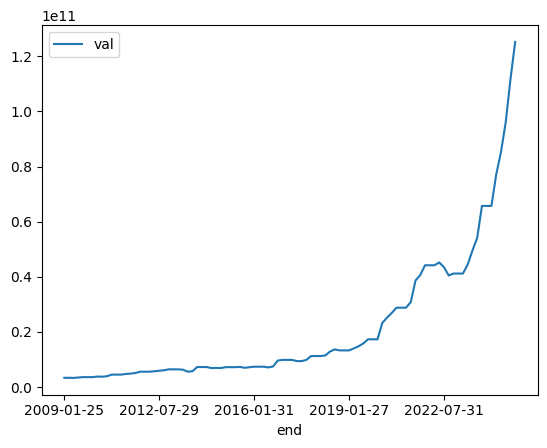

In [75]:

# plot 
assets10Q.plot(x='end', y='val')